In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('german_credit_data.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
df.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


In [5]:
df.shape

(1000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [7]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

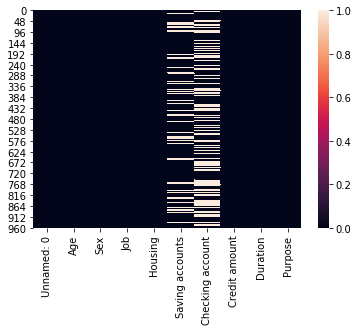

In [8]:
sns.heatmap(df.isnull())

In [9]:
numerical=['Credit amount','Age','Duration']
categorical=['Sex','Job','Housing','Saving accounts','Checking account','Purpose']
unused=['Unnamed: 0']

In [10]:
df=df.drop(columns=unused)

In [11]:
df.sample(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
226,27,male,2,own,rich,moderate,10961,48,radio/TV
750,49,female,2,own,little,little,428,6,furniture/equipment
788,50,male,2,free,little,moderate,6224,48,education
974,33,female,2,own,little,NaN,2831,30,radio/TV
97,34,male,2,own,moderate,moderate,2622,18,business


In [12]:
for cat in categorical:
    df[cat]=df[cat].fillna(df[cat].mode().values[0])

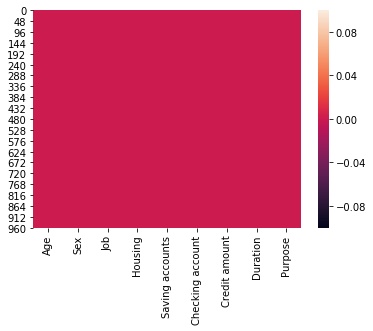

In [13]:
sns.heatmap(df.isnull())

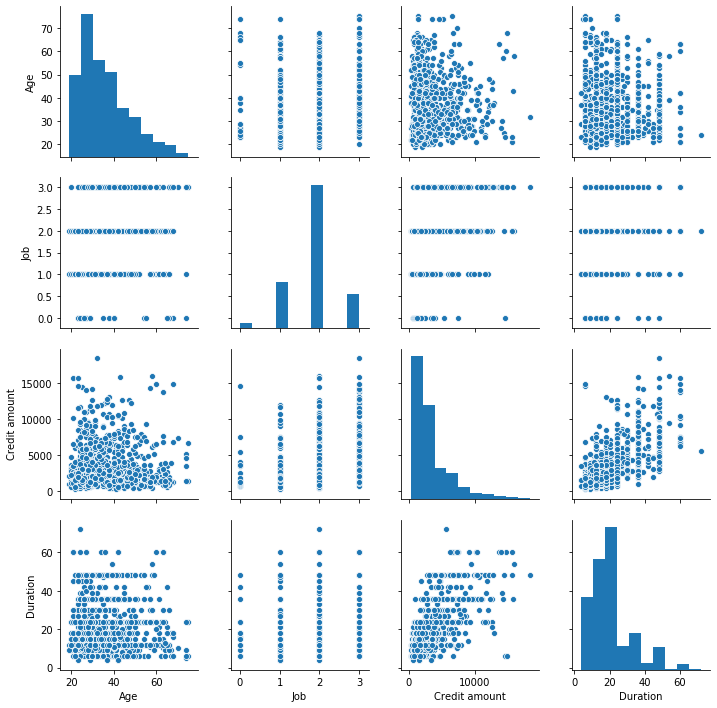

In [14]:
sns.pairplot(df)

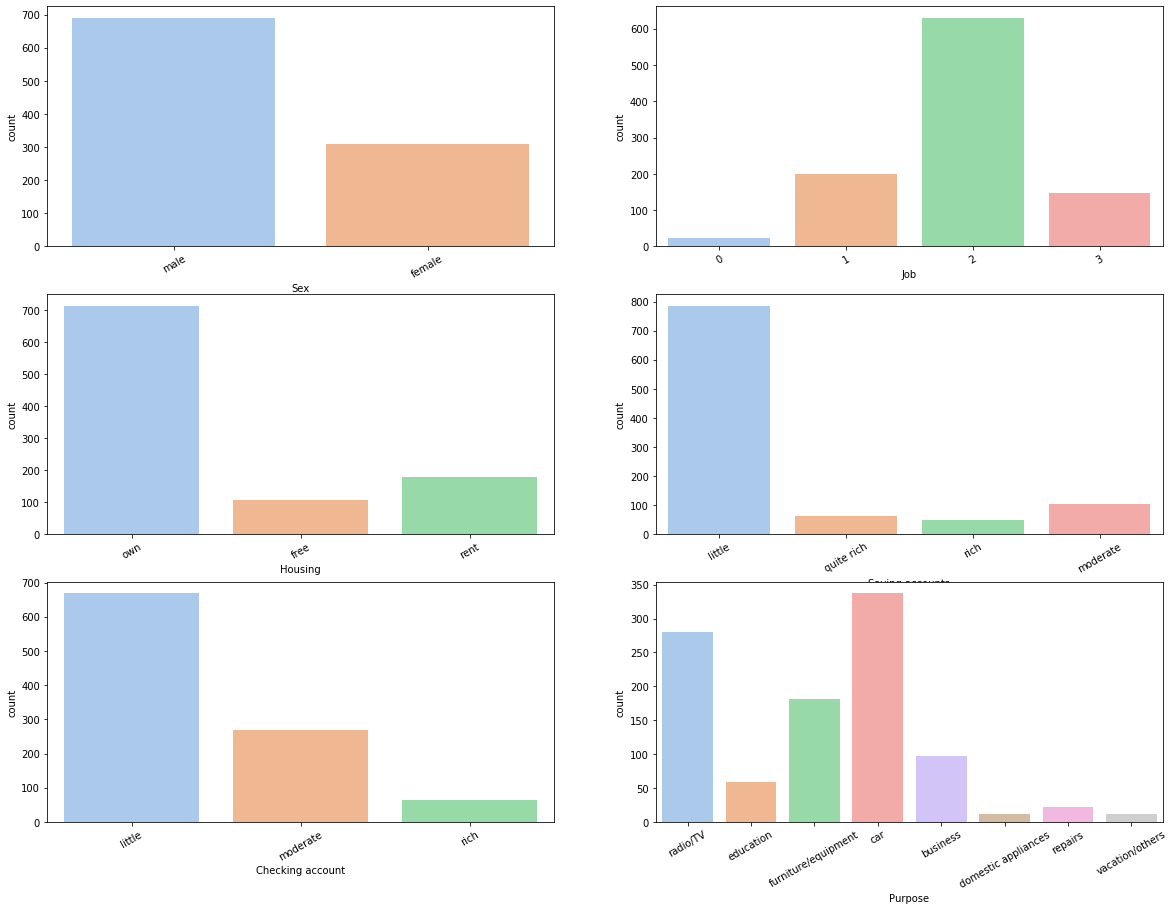

In [15]:
fig=plt.figure(figsize=(20,15))
axes=320
for cat in categorical:
    axes+=1
    fig.add_subplot(axes)
    sns.countplot(data=df,x=cat,palette='pastel')
    plt.xticks(rotation=30)
plt.show()

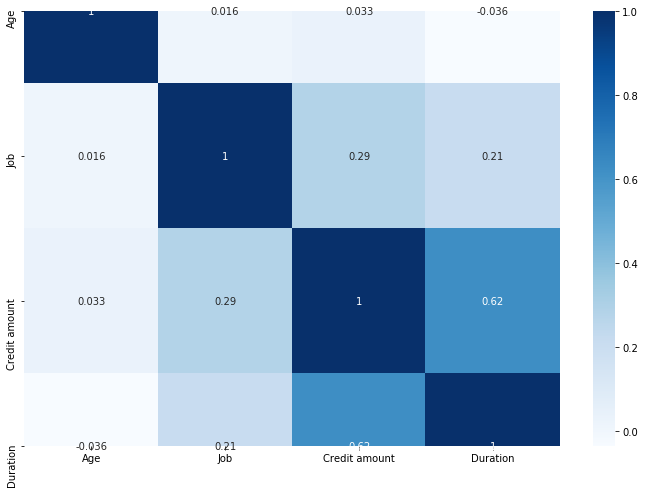

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [17]:
data=pd.DataFrame()
data['Credit amount']=df['Credit amount']
data['Age']=df['Age']
data['Duration']=df['Duration']
data['Job']=df['Job']
data.sample(5)

,Credit amount,Age,Duration,Job
922,1366,22,9,2
462,3017,34,12,3
401,1887,28,18,2
668,4843,43,12,2
97,2622,34,18,2


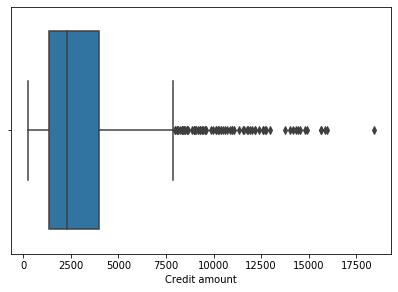

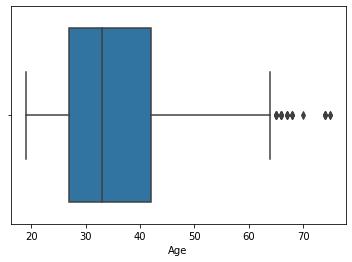

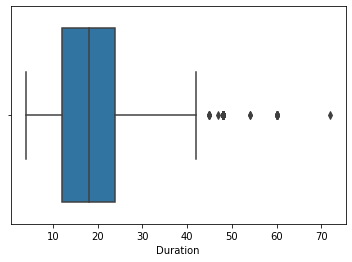

In [18]:
fig=plt.figure(figsize=(15,10))
axes=220
for num in numerical:
    axes+=1
    fig.add_subplot(axes)
    sns.boxplot(data=data,x=num)
    plt.show()

<function matplotlib.pyplot.legend(*args, **kwargs)>

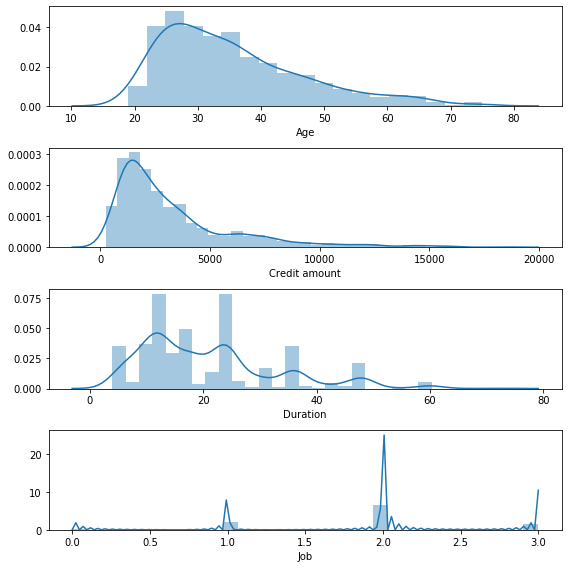

In [19]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(8,8))
sns.distplot(df['Age'],ax=ax1)
sns.distplot(df['Credit amount'],ax=ax2)
sns.distplot(df['Duration'],ax=ax3)
sns.distplot(df['Job'],ax=ax4)
plt.tight_layout()
plt.legend


No handles with labels found to put in legend.


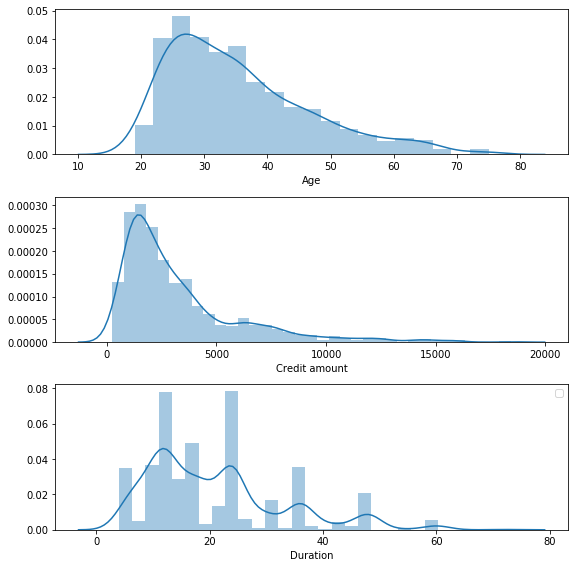

In [20]:
data_log=np.log(data[['Age','Credit amount','Duration']])
fig,(ax1,ax2,ax3)=plt.subplots(3,1, figsize=(8,8))
sns.distplot(df['Age'],ax=ax1)
sns.distplot(df['Credit amount'],ax=ax2)
sns.distplot(df['Duration'],ax=ax3)
plt.tight_layout()
plt.legend()

In [21]:
data_log.sample(5)

,Age,Credit amount,Duration
711,3.555348,7.088409,1.791759
348,3.526361,7.463363,1.791759
920,3.332205,7.504942,2.890372
531,3.332205,7.875119,2.708050
428,2.995732,7.180070,2.197225


In [22]:
sc=StandardScaler()
dff=sc.fit_transform(data_log)

In [23]:
#  Using Elbow method to determinte the optmal k value for the k means

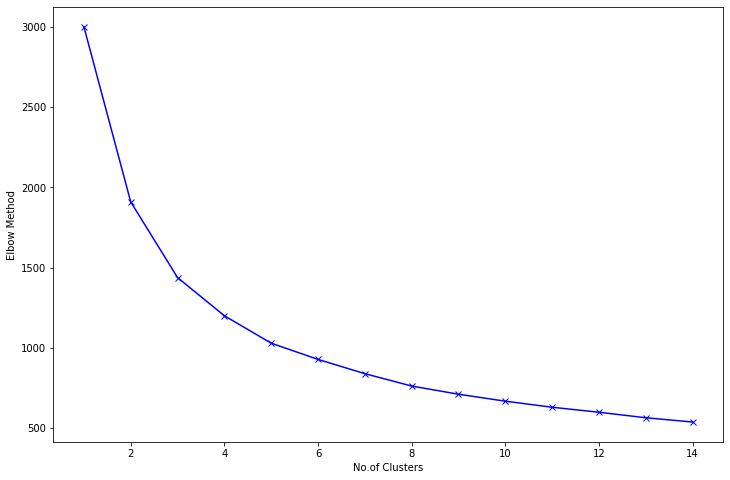

In [24]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans=kmeans.fit(dff)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.plot(range(1,15),wcss,'bx-')
plt.xlabel('No.of Clusters')
plt.ylabel('Elbow Method')
plt.show()

In [25]:
# from the figure above we will choose k=3

In [26]:
from mpl_toolkits.mplot3d import Axes3D

K-Means


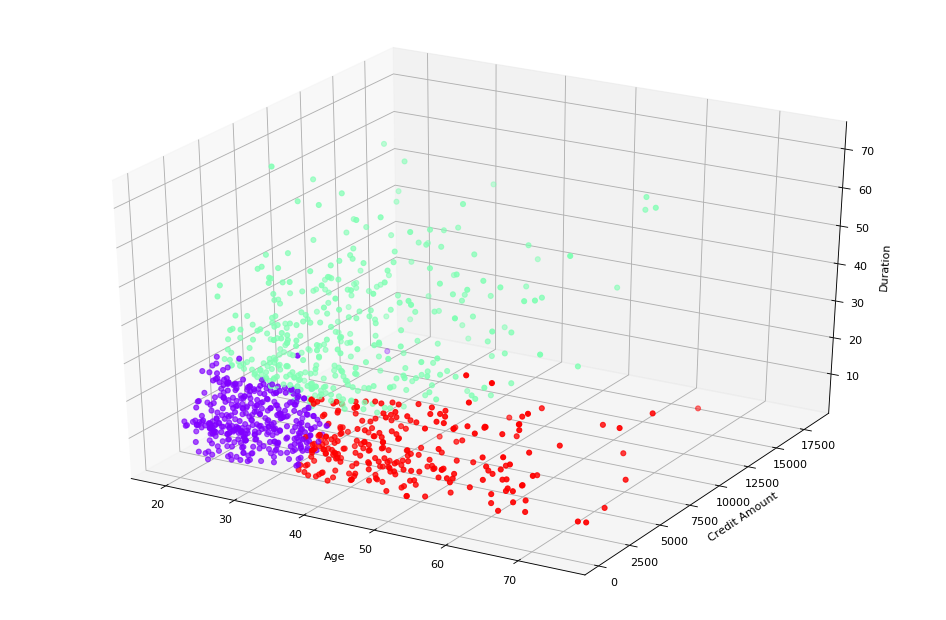

In [27]:
model=KMeans(n_clusters=3,init="k-means++",random_state=42)
model.fit(dff)
kmeans_labels=model.labels_

fig=plt.figure(num=None,figsize=(15,10),dpi=80,facecolor='w',edgecolor='k')
ax=plt.axes(projection='3d')

ax.scatter3D(data['Age'],data['Credit amount'],
             data['Duration'],c=kmeans_labels,cmap='rainbow')
xLabel=ax.set_xlabel('Age',linespacing=3.2)
yLabel=ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel=ax.set_zlabel('Duration',linespacing=3.4)
print('K-Means')

In [28]:
data_kmeans=data.assign(Cluster=kmeans_labels)
grouped_kmeans=data_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

,Credit amount,Age,Duration,Job
Cluster,,,,
0,1737.5,27.7,14.3,1.8
1,5665.4,34.0,32.2,2.1
2,1970.5,48.6,13.9,1.8


In [29]:
# Hierarchical Agglomerative Clustering

In [30]:
import scipy.cluster.hierarchy as sch

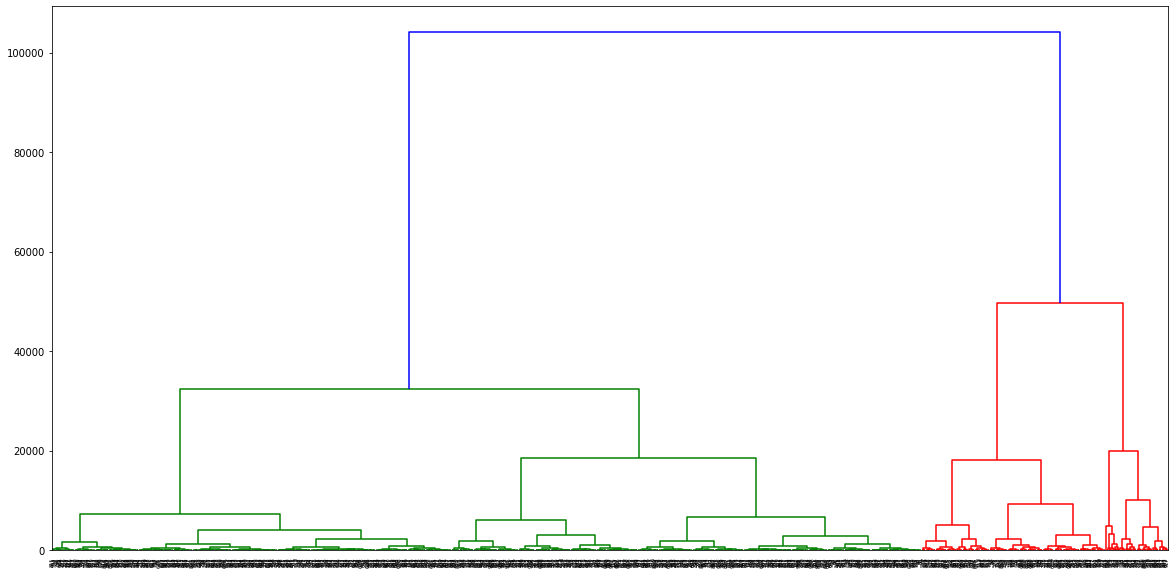

In [31]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(data,method='ward'))

Hierarchical Agglomerative Clustering


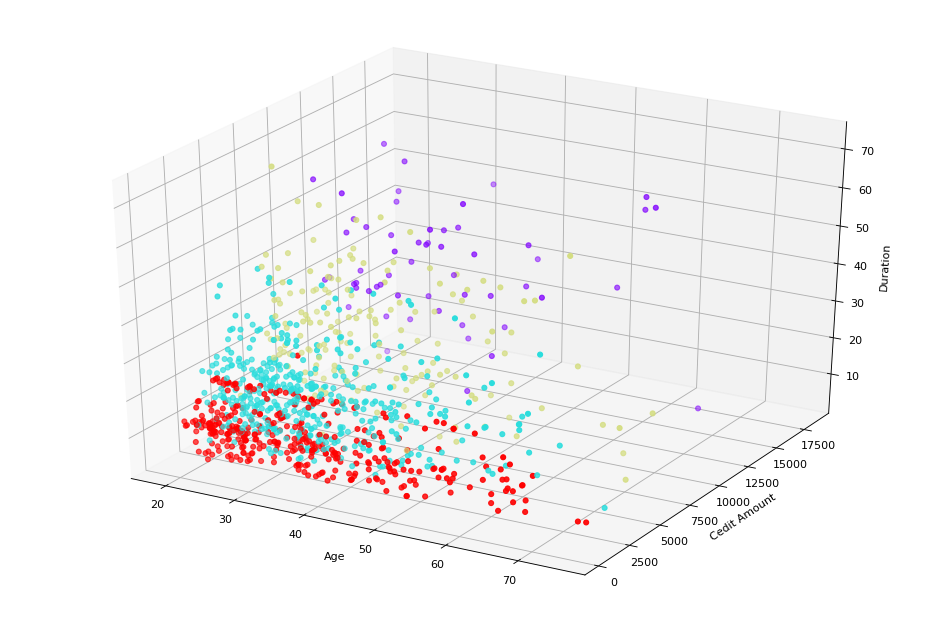

In [32]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=4)
model.fit(data)
hac_labels=model.labels_

fig=plt.figure(num=None, figsize=(15,10),dpi=80, facecolor='w',edgecolor='k')
ax=plt.axes(projection='3d')

ax.scatter3D(data['Age'],data['Credit amount'],data['Duration'],c=hac_labels,cmap='rainbow')

xLabel=ax.set_xlabel('Age',linespacing=3.2)
yLabel=ax.set_ylabel('Cedit Amount',linespacing=3.1)
zLabel=ax.set_zlabel('Duration',linespacing=3.4)
print('Hierarchical Agglomerative Clustering')

DBSCAN


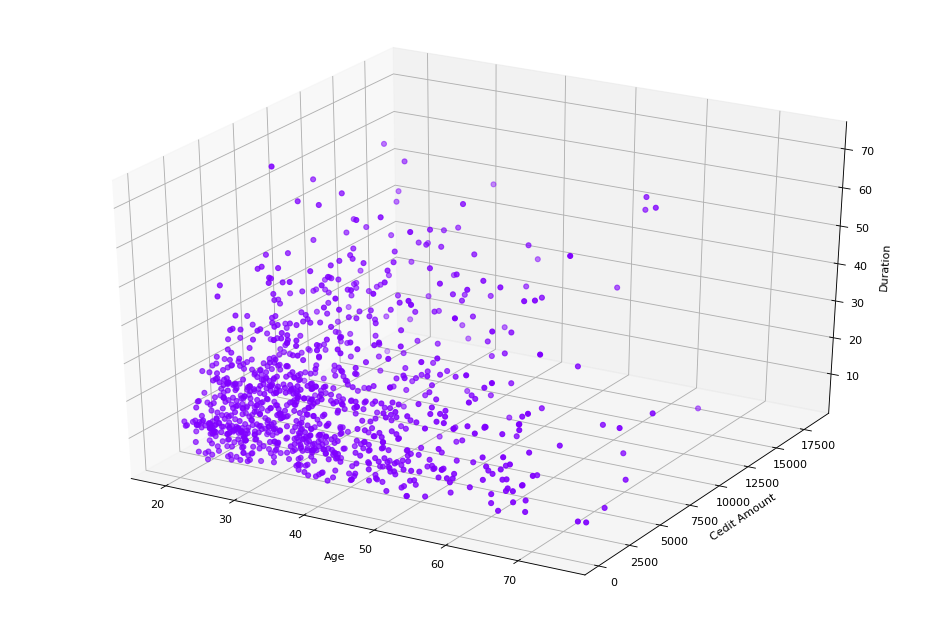

In [33]:
from sklearn.cluster import DBSCAN

model=DBSCAN()
model.fit(data)
dbs_labels=model.labels_

fig=plt.figure(num=None, figsize=(15,10),dpi=80, facecolor='w',edgecolor='k')
ax=plt.axes(projection='3d')

ax.scatter3D(data['Age'],data['Credit amount'],data['Duration'],c=dbs_labels,cmap='rainbow')

xLabel=ax.set_xlabel('Age',linespacing=3.2)
yLabel=ax.set_ylabel('Cedit Amount',linespacing=3.1)
zLabel=ax.set_zlabel('Duration',linespacing=3.4)
print('DBSCAN')